This script will take the average of the SASA values per atom per trajectory, find the surface exposed residues, and save them into a numpy file. Then, it will save the non-surface residues into a numpy file. The non-surface residues are any residues that don't show up in the surface exposed residue list. 

In [1]:
pwd

'/Users/shahlosolieva/Desktop/BGA_manuscript/solvent_accessible_surface_area/testing_other_percentile_values'

In [2]:
path_to_external_drive = "../../../../../../Volumes/Passport_for_Mac/files_from_owlsnest_May16_2022/p16925/curating_dataset/SASA_calculations_May15_2022/"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

### Calculate the average SASA per atom 

The percentile_value serves as the cutoff for defining surface vs nonsurface residues

In [5]:
percentile_value = 40

Define the paths for the SASA data:

In [6]:
lists1M=["SASA_data_files/SASA_1M_run5_unbound.npy",
         "SASA_data_files/SASA_1M_run6_unbound.npy",
         "SASA_data_files/SASA_1M_run7_unbound.npy",
         "SASA_data_files/SASA_1M_run26_unbound.npy",
         "SASA_data_files/SASA_1M_run27_unbound.npy"]
lists2M=["SASA_data_files/SASA_2M_run5_unbound.npy",
         "SASA_data_files/SASA_2M_run6_unbound.npy",
         "SASA_data_files/SASA_2M_run7_unbound.npy",
         "SASA_data_files/SASA_2M_run38_unbound.npy",
         "SASA_data_files/SASA_2M_run39_unbound.npy"]
lists3M=["SASA_data_files/SASA_3M_run13_unbound.npy",
         "SASA_data_files/SASA_3M_run14_unbound.npy",
         "SASA_data_files/SASA_3M_run15_unbound.npy",
         "SASA_data_files/SASA_3M_run30_unbound.npy",
         "SASA_data_files/SASA_3M_run31_unbound.npy"]
lists4M=["SASA_data_files/SASA_4M_run21_unbound.npy",
         "SASA_data_files/SASA_4M_run22_unbound.npy",
         "SASA_data_files/SASA_4M_run23_unbound.npy",
         "SASA_data_files/SASA_4M_run34_unbound.npy",
         "SASA_data_files/SASA_4M_run35_unbound.npy"]
lists = lists1M+lists2M+lists3M+lists4M

Calculate the average SASA per atom 

In [7]:
list_of_averages_atom = []
for i in range(len(lists)):
    datafile2 = np.load(path_to_external_drive+lists[i], allow_pickle=True)
    avg = []
    for j in range(len(datafile2)):
        avg.append(np.average(datafile2[j], axis=0))
    avg_2 = np.average(avg,axis=0)
    list_of_averages_atom.append(avg_2)

40 percentile has a SASA value of 0.0017733434215188037


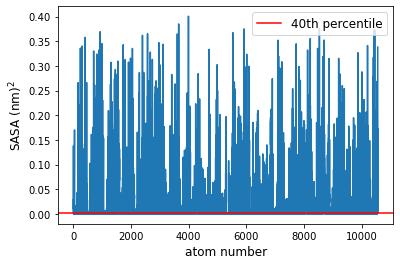

In [8]:
# example plot of the SASA value per atom, this is the system with 1M and 10C
plt.plot(list_of_averages_atom[0])
plt.ylabel("SASA $\mathregular{(nm)^2}$",fontsize=12)
plt.xlabel("atom number",fontsize=12)
plt.axhline(np.percentile(list_of_averages_atom[0], percentile_value), color="red", label="%dth percentile"%percentile_value)
plt.legend(fontsize=12)
print("%d percentile has a SASA value of"%percentile_value, np.percentile(list_of_averages_atom[0], percentile_value))

### Find the atoms that have a SASA value equal to or greater than a certain value. This certain value is defined here as being the nth percentile of the average SASA per atom values, where n = percentile_value

Here are the cutoff values for each molarity and temperature: 

In [9]:
print("the %dth percentile of the SASA data is:"%percentile_value)
for i in range(len(list_of_averages_atom)):
    print(lists[i], np.percentile(list_of_averages_atom[i], percentile_value))

the 40th percentile of the SASA data is:
SASA_data_files/SASA_1M_run5_unbound.npy 0.0017733434215188037
SASA_data_files/SASA_1M_run6_unbound.npy 0.0018689926946535709
SASA_data_files/SASA_1M_run7_unbound.npy 0.0018991187447682026
SASA_data_files/SASA_1M_run26_unbound.npy 0.001893300074152649
SASA_data_files/SASA_1M_run27_unbound.npy 0.0019282724475488068
SASA_data_files/SASA_2M_run5_unbound.npy 0.002444764412939549
SASA_data_files/SASA_2M_run6_unbound.npy 0.002482492616400126
SASA_data_files/SASA_2M_run7_unbound.npy 0.0024900147225707775
SASA_data_files/SASA_2M_run38_unbound.npy 0.0024863327853381647
SASA_data_files/SASA_2M_run39_unbound.npy 0.0024928306229412564
SASA_data_files/SASA_3M_run13_unbound.npy 0.002366305701434612
SASA_data_files/SASA_3M_run14_unbound.npy 0.0023726936429739015
SASA_data_files/SASA_3M_run15_unbound.npy 0.0024488681927323343
SASA_data_files/SASA_3M_run30_unbound.npy 0.002445609821006656
SASA_data_files/SASA_3M_run31_unbound.npy 0.0024308010004460818
SASA_data_

For each set, find the atoms that have a SASA value >= to the respective cutoff and save them to the list atom_lists

In [10]:
atoms_lists = []
for i in range(len(list_of_averages_atom)):
    atoms_list = []
    for j in range(len(list_of_averages_atom[i])):
        if list_of_averages_atom[i][j] >= np.percentile(list_of_averages_atom[i], percentile_value):
            atoms_list.append(j)
    atoms_lists.append(atoms_list)

For each set, this is how many atoms were found to have a SASA value >= the cutoff value:

In [11]:
print("number of atoms for each set that have a SASA value >= the cutoff value:")
for i in range(len(atoms_lists)):
    print(lists[i], len(atoms_lists[i]))

number of atoms for each set that have a SASA value >= the cutoff value:
SASA_data_files/SASA_1M_run5_unbound.npy 6336
SASA_data_files/SASA_1M_run6_unbound.npy 6336
SASA_data_files/SASA_1M_run7_unbound.npy 6336
SASA_data_files/SASA_1M_run26_unbound.npy 6336
SASA_data_files/SASA_1M_run27_unbound.npy 6336
SASA_data_files/SASA_2M_run5_unbound.npy 6336
SASA_data_files/SASA_2M_run6_unbound.npy 6336
SASA_data_files/SASA_2M_run7_unbound.npy 6336
SASA_data_files/SASA_2M_run38_unbound.npy 6336
SASA_data_files/SASA_2M_run39_unbound.npy 6336
SASA_data_files/SASA_3M_run13_unbound.npy 6336
SASA_data_files/SASA_3M_run14_unbound.npy 6336
SASA_data_files/SASA_3M_run15_unbound.npy 6336
SASA_data_files/SASA_3M_run30_unbound.npy 6336
SASA_data_files/SASA_3M_run31_unbound.npy 6336
SASA_data_files/SASA_4M_run21_unbound.npy 6336
SASA_data_files/SASA_4M_run22_unbound.npy 6336
SASA_data_files/SASA_4M_run23_unbound.npy 6336
SASA_data_files/SASA_4M_run34_unbound.npy 6336
SASA_data_files/SASA_4M_run35_unbound.np

### Find which residues these atoms belong to

Import a structure file from any of the sets 

In [13]:
top = md.load("../../example_files/p16925-r27-c0.gro")

Select all of the atoms in the protein:

In [14]:
atom_indices = top.topology.select("residue 1 to 700") # the protein has 700 residues

Find the residues that the atoms belong to:

In [15]:
res_lists_ = []
for i in range(len(atoms_lists)):
    res_list = []
    for j in range(len(atoms_lists[i])):
        res_list.append(str(top.topology.atom(atoms_lists[i][j]).residue)[3:])
    res_lists_.append(res_list)
    
res_lists = []
for i in range(len(res_lists_)):
    res_lists_int = []
    for j in range(len(res_lists_[i])):
        res_lists_int.append(int(res_lists_[i][j]))
    res_lists.append(np.unique(res_lists_int))

print("number of surface residues for each set: ")
for i in range(len(res_lists)):
    print(lists[i],len(res_lists[i]))

np.save("surface_nonsurface_residues/surface_residues_%dth_percentile.npy"%percentile_value, res_lists)

number of surface residues for each set: 
SASA_data_files/SASA_1M_run5_unbound.npy 674
SASA_data_files/SASA_1M_run6_unbound.npy 675
SASA_data_files/SASA_1M_run7_unbound.npy 672
SASA_data_files/SASA_1M_run26_unbound.npy 666
SASA_data_files/SASA_1M_run27_unbound.npy 663
SASA_data_files/SASA_2M_run5_unbound.npy 668
SASA_data_files/SASA_2M_run6_unbound.npy 666
SASA_data_files/SASA_2M_run7_unbound.npy 668
SASA_data_files/SASA_2M_run38_unbound.npy 667
SASA_data_files/SASA_2M_run39_unbound.npy 668
SASA_data_files/SASA_3M_run13_unbound.npy 673
SASA_data_files/SASA_3M_run14_unbound.npy 670
SASA_data_files/SASA_3M_run15_unbound.npy 668
SASA_data_files/SASA_3M_run30_unbound.npy 670
SASA_data_files/SASA_3M_run31_unbound.npy 666
SASA_data_files/SASA_4M_run21_unbound.npy 679
SASA_data_files/SASA_4M_run22_unbound.npy 675
SASA_data_files/SASA_4M_run23_unbound.npy 670
SASA_data_files/SASA_4M_run34_unbound.npy 665
SASA_data_files/SASA_4M_run35_unbound.npy 668


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


Print the surface residues for the first set as an example: 

In [16]:
print(list(res_lists[0]))

[1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 2

### Find which residues are not surface exposed

If a residue is not in the surface residues list, then it will be counted as a nonsurface residue

In [17]:
res_lists_nonsurface = []
for j in range(len(res_lists)):
    res_b = []
    for i in range(1,701):
        if i not in res_lists[j]:
            res_b.append(i)
    res_lists_nonsurface.append(res_b)
print("number of non-surface residues for each set: ")
for i in range(len(res_lists_nonsurface)):
    print(lists[i], len(res_lists_nonsurface[i]))
np.save("surface_nonsurface_residues/nonsurface_residues_%dth_percentile.npy"%percentile_value, res_lists_nonsurface)

number of non-surface residues for each set: 
SASA_data_files/SASA_1M_run5_unbound.npy 26
SASA_data_files/SASA_1M_run6_unbound.npy 25
SASA_data_files/SASA_1M_run7_unbound.npy 28
SASA_data_files/SASA_1M_run26_unbound.npy 34
SASA_data_files/SASA_1M_run27_unbound.npy 37
SASA_data_files/SASA_2M_run5_unbound.npy 32
SASA_data_files/SASA_2M_run6_unbound.npy 34
SASA_data_files/SASA_2M_run7_unbound.npy 32
SASA_data_files/SASA_2M_run38_unbound.npy 33
SASA_data_files/SASA_2M_run39_unbound.npy 32
SASA_data_files/SASA_3M_run13_unbound.npy 27
SASA_data_files/SASA_3M_run14_unbound.npy 30
SASA_data_files/SASA_3M_run15_unbound.npy 32
SASA_data_files/SASA_3M_run30_unbound.npy 30
SASA_data_files/SASA_3M_run31_unbound.npy 34
SASA_data_files/SASA_4M_run21_unbound.npy 21
SASA_data_files/SASA_4M_run22_unbound.npy 25
SASA_data_files/SASA_4M_run23_unbound.npy 30
SASA_data_files/SASA_4M_run34_unbound.npy 35
SASA_data_files/SASA_4M_run35_unbound.npy 32


Print the nonsurface residues for the first set as an example: 

In [18]:
print(list(res_lists_nonsurface[0]))

[4, 5, 9, 24, 32, 33, 34, 68, 138, 160, 164, 174, 255, 263, 269, 314, 331, 346, 348, 349, 366, 380, 401, 408, 455, 608]


## Graph the number of surface and nonsurface residues per condition when using this percentile value:

In [19]:
res_lists_nonsurface = res_lists_nonsurface
res_lists_surface    = res_lists

In [20]:
# calculate the number of residues in each list 
number_of_surface_res = []
number_of_nonsurface_res = []
for i in range(len(res_lists_surface)):
    number_of_surface_res.append(len(res_lists_surface[i]))
    number_of_nonsurface_res.append(len(res_lists_nonsurface[i]))

In [21]:
# split the lists into their respective conditions to make graphing easier
number_of_surface_res_1M    = number_of_surface_res[0:5]
number_of_nonsurface_res_1M = number_of_nonsurface_res[0:5]

number_of_surface_res_2M    = number_of_surface_res[5:10]
number_of_nonsurface_res_2M = number_of_nonsurface_res[5:10]

number_of_surface_res_3M    = number_of_surface_res[10:15]
number_of_nonsurface_res_3M = number_of_nonsurface_res[10:15]

number_of_surface_res_4M    = number_of_surface_res[15:20]
number_of_nonsurface_res_4M = number_of_nonsurface_res[15:20]

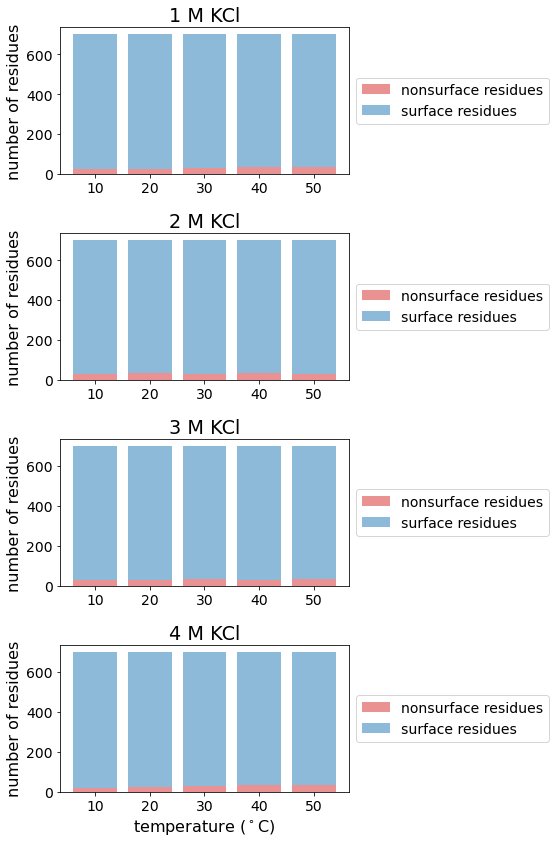

In [22]:
surface    = [number_of_surface_res_1M,number_of_surface_res_2M,number_of_surface_res_3M,number_of_surface_res_4M]
nonsurface = [number_of_nonsurface_res_1M,number_of_nonsurface_res_2M,number_of_nonsurface_res_3M,number_of_nonsurface_res_4M]
x = ["10","20","30","40","50"]
molarities=["1 M KCl","2 M KCl","3 M KCl","4 M KCl"]
    
fig, axs = plt.subplots(4, figsize=[8,12])
plt.rcParams['font.size'] = '16'
for i in range(4):
    y1 = nonsurface[i]
    y2 = surface[i]
    axs[i].bar(x, y1, alpha = 0.5,  color = "C3", label="nonsurface residues")
    axs[i].bar(x, y2, bottom=y1, alpha=0.5, color='C0', label="surface residues")
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    axs[i].tick_params(axis="both", labelsize=14)
    axs[i].set_ylabel("number of residues",fontsize=16)
    axs[i].set_title("%s"%molarities[i])
axs[3].set_xlabel("temperature ($^\circ$C)",fontsize=16)
fig.tight_layout()
fig.savefig("graphs/number_of_surface_nonsurface_residues_%dth_percentile.png"%percentile_value)